In [1]:
import sys

import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.options.display.max_rows = 10
original = pd.read_csv('./train.csv', index_col="PassengerId")
original

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
# Ще започна с начално пускане на някой алгоритъм върху данните преди основната част от feature engineering-а
# За целта ще се оттърва от всички данни които на пръв поглед изглеждат безполезни.

basic_data = original.copy();
basic_data = basic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1);
basic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [4]:
# Сега ще onehot encode-на Sex и Embarked
basic_data = basic_data.join(pd.get_dummies(basic_data['Embarked']))
basic_data = basic_data.join(pd.get_dummies(basic_data['Sex']))
basic_data = basic_data.drop(['Sex', 'Embarked'], axis=1)
basic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,1,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,1,0
3,1,3,26.0,0,0,7.9250,0,0,1,1,0
4,1,1,35.0,1,0,53.1000,0,0,1,1,0
5,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,0,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1,1,0
889,0,3,NaN,1,2,23.4500,0,0,1,1,0


In [5]:
# Нека видим празните стойности

basic_data.isnull().sum().sort_values()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
           ... 
Q             0
S             0
female        0
male          0
Age         177
Length: 11, dtype: int64

In [6]:
basic_data['Age'] = basic_data.Age.fillna(basic_data.Age.mean())
basic_data

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
PassengerId,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,0,1,0,1
2,1,1,38.000000,1,0,71.2833,1,0,0,1,0
3,1,3,26.000000,0,0,7.9250,0,0,1,1,0
4,1,1,35.000000,1,0,53.1000,0,0,1,1,0
5,0,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,0,1,0,1
888,1,1,19.000000,0,0,30.0000,0,0,1,1,0
889,0,3,29.699118,1,2,23.4500,0,0,1,1,0


In [7]:
# Правя train_test_split

x_basic = basic_data.drop('Survived', axis=1)
y_basic = basic_data['Survived']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_basic,
                                                    y_basic,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y_basic)

for curr in [x_train, x_test, y_train, y_test]:
    print(curr.shape)

(623, 10)
(268, 10)
(623,)
(268,)


In [8]:
# Ще пробвам с логистична регресия

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score:", model.score(x_test, y_test))

train score: 0.797752808989
test score: 0.794776119403


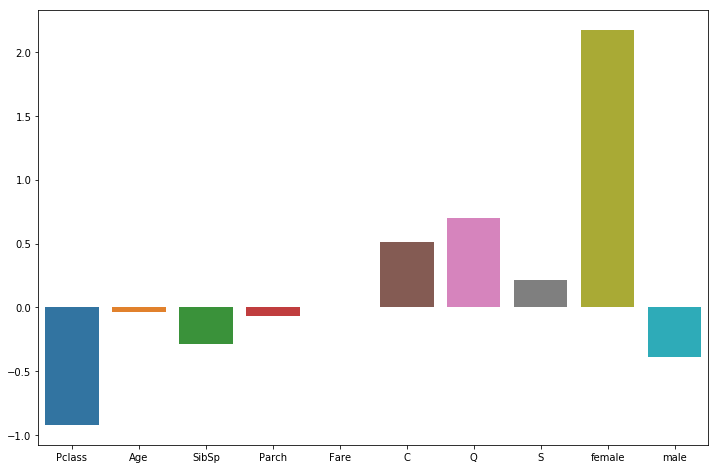

In [9]:
# Приличен резултат, да видим какво е открила логистичната регресия
def plt_features(x, model):
    plt.figure(figsize = (12, 8))
    barplot = sns.barplot(x=x.columns, y=model.coef_[0], orient='vertical')

plt_features(x_train, model)

In [10]:
# Класата има голямо значение и не е 3та класа не е 3 пъти повече от 1ва
# Затова, като за начало ще one-hot encode-на и класата

one_hot = pd.get_dummies(basic_data['Pclass'])
one_hot.columns = ['class' + str(col) for col in one_hot.columns]
basic_data = basic_data.join(one_hot);
basic_data = basic_data.drop('Pclass', axis=1)
basic_data

,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,class1,class2,class3
PassengerId,,,,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
3,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,35.000000,1,0,53.1000,0,0,1,1,0,1,0,0
5,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.000000,0,0,13.0000,0,0,1,0,1,0,1,0
888,1,19.000000,0,0,30.0000,0,0,1,1,0,1,0,0
889,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1


In [11]:
# да тестваме отново

from sklearn.model_selection import train_test_split

def logistic_test():
    x_basic = basic_data.drop('Survived', axis=1)
    y_basic = basic_data['Survived']

    x_train, x_test, y_train, y_test = train_test_split(x_basic,
                                                        y_basic,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify=y_basic)
    model = LogisticRegression().fit(x_train, y_train)
    print("train score:", model.score(x_train, y_train))
    print("test score:", model.score(x_test, y_test))
    return model

model = logistic_test()

train score: 0.805778491172
test score: 0.798507462687


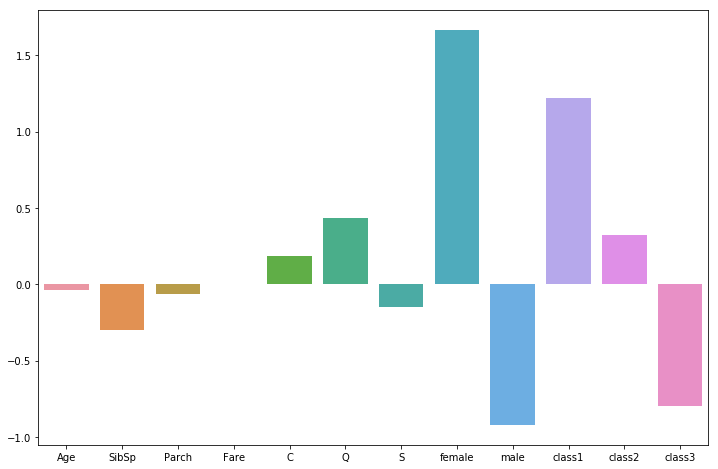

In [12]:
# леко подобрение

plt_features(basic_data.drop('Survived', axis=1), model)

In [13]:
# Поради някаква причина Fare не се разглежда от логистичната регресия,
# а би следвало да има връзка между това колко си платил за каюта и дали си се измъкнал.
# Да се върнем към оригиналния dataset и да разгледаме за статистики

print('survived_mean_fare:', original[original.Survived == 1].Fare.mean())
print('died_mean_fare:', original[original.Survived == 0].Fare.mean())

survived_mean_fare: 48.3954076023
died_mean_fare: 22.1178868852


In [14]:
# има някаква информация във Fare, да разчоплим
# Като за начало, да видим дали сумата посочена във Fare се отнася за един човек или за целия билет

# В tickets_count събирам бройката 
tickets_count = {}
for ticket in original.Ticket:
    if ticket in tickets_count:
        tickets_count[ticket] += 1
    else:
        tickets_count[ticket] = 1
tickets_count

{'110152': 3,
 '110413': 3,
 '110465': 2,
 '110564': 1,
 '110813': 1,
 '111240': 1,
 '111320': 1,
 '111361': 2,
 '111369': 1,
 '111426': 1,
 '111427': 1,
 '111428': 1,
 '112050': 1,
 '112052': 1,
 '112053': 1,
 '112058': 1,
 '112059': 1,
 '112277': 1,
 '112379': 1,
 '113028': 1,
 '113043': 1,
 '113050': 1,
 '113051': 1,
 '113055': 1,
 '113056': 1,
 '113059': 1,
 '113501': 1,
 '113503': 1,
 '113505': 2,
 '113509': 1,
 '113510': 1,
 '113514': 1,
 '113572': 2,
 '113760': 4,
 '113767': 1,
 '113773': 1,
 '113776': 2,
 '113781': 4,
 '113783': 1,
 '113784': 1,
 '113786': 1,
 '113787': 1,
 '113788': 1,
 '113789': 2,
 '113792': 1,
 '113794': 1,
 '113796': 1,
 '113798': 2,
 '113800': 1,
 '113803': 2,
 '113804': 1,
 '113806': 2,
 '113807': 1,
 '11668': 2,
 '11751': 2,
 '11752': 1,
 '11753': 1,
 '11755': 1,
 '11765': 1,
 '11767': 2,
 '11769': 1,
 '11771': 1,
 '11774': 1,
 '11813': 1,
 '11967': 2,
 '12233': 1,
 '12460': 1,
 '12749': 2,
 '13049': 1,
 '13213': 1,
 '13214': 1,
 '13502': 3,
 '13507': 2

In [15]:
# Виждам примерно че '110152' има 3 срещания. Да проверим дали цените са еднакви.

original[original.Ticket == '110152']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5,B77,S
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5,B79,S
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S


In [16]:
# При това положение има логика това да е всъщност цената на билета за 3ма.
# Нас по скоро ни интересува цената на човек. За това добавям такава колона.

original['PeopleWithSameTicket'] = original['Ticket'].apply(lambda t: tickets_count[t])
original['FarePerPerson'] = original['Fare']/original['PeopleWithSameTicket']
original

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PeopleWithSameTicket,FarePerPerson
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.5500
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2,11.7250


In [17]:
# Да проверим дали има подобрение в средните стойности на оцелелите и загиналите

print('survived_mean_fare:', original[original.Survived == 1].FarePerPerson.mean())
print('died_mean_fare:', original[original.Survived == 0].FarePerPerson.mean())

survived_mean_fare: 24.6356280006
died_mean_fare: 13.5238693512


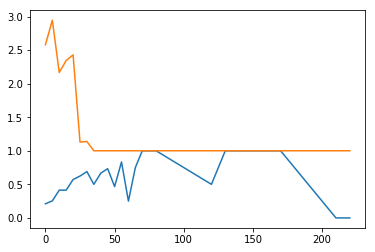

In [18]:
# Да видим графика на оцелели спрямо FarePerPerson и също така дали случайно Fare-а не е зависим от класата

fares = original[['FarePerPerson', 'Survived', 'Pclass']].copy()
fares.FarePerPerson = fares.FarePerPerson.apply(lambda x: x//5 * 5)
plt.plot(fares.groupby('FarePerPerson').mean())

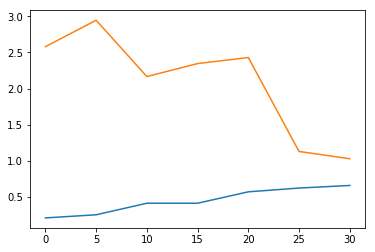

In [19]:
# Така като се гледа е очевидно че за големи стойности на FarePerPerson класата и 1ва
# При това сякаш не носи много информация тогава.
# Но нека забележим че за малки стойности на FarePerPerson се наблюдава чисто изкачване на процента оживели.
# Затова, ще преправим данните така че всички стойности над 30 да са 30.

fares.FarePerPerson = fares.FarePerPerson.apply(lambda x: 30 if x>=30 else x)
plt.plot(fares.groupby('FarePerPerson').mean())

In [20]:
# Изглежда обещаващо, да добавим колоната към basic_data

basic_data['FPP'] = original['FarePerPerson'].apply(lambda x: 30 if x>=30 else x//5*5)
basic_data = basic_data.drop('Fare', axis=1)
model = logistic_test()

train score: 0.808988764045
test score: 0.805970149254


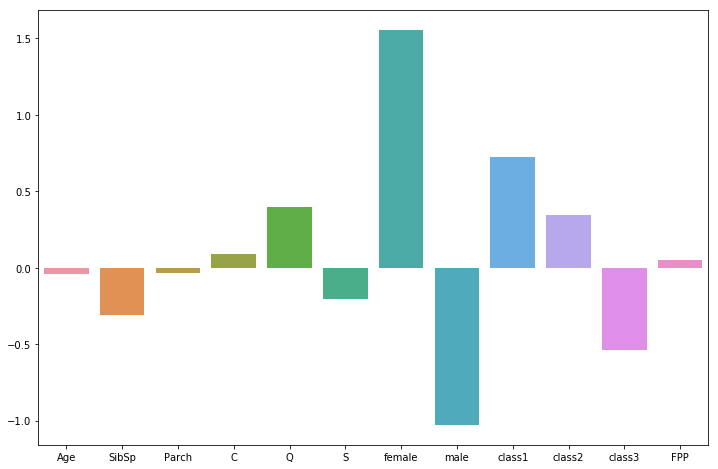

In [21]:
plt_features(basic_data.drop('Survived', axis=1), model)

In [22]:
# има подобрение, да видим дали ще постигнем нещо ако добавим и броя хора с билет (пак е нещо)

basic_data['pwst'] = original['PeopleWithSameTicket']
model = logistic_test()

train score: 0.799357945425
test score: 0.805970149254


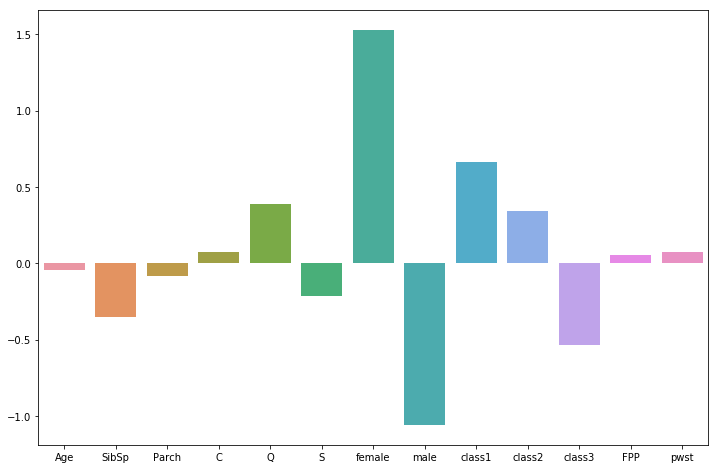

In [23]:
plt_features(basic_data.drop('Survived', axis=1), model)

In [24]:
# дава лош резултат така че го махам
basic_data = basic_data.drop('pwst', axis=1)

In [25]:
# не мисля да добавям титлите разгледани на лекцията
# за сметка на това ще добавя категории за възрастта (в частност isChild и isOld)
# за isChild ще използвам и титлата Master
basic_data['isChild'] = (basic_data['Age'] < 18) | (original['Name'].str.extract('([A-Za-z]+)\.', expand=False) == 'Master')
basic_data['isOld'] = (basic_data['Age'] > 50)
basic_data = basic_data.drop('Age', axis=1)
basic_data

,Survived,SibSp,Parch,C,Q,S,female,male,class1,class2,class3,FPP,isChild,isOld
PassengerId,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,1,0,0,1,5.0,False,False
2,1,1,0,1,0,0,1,0,1,0,0,30.0,False,False
3,1,0,0,0,0,1,1,0,0,0,1,5.0,False,False
4,1,1,0,0,0,1,1,0,1,0,0,25.0,False,False
5,0,0,0,0,0,1,0,1,0,0,1,5.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,0,0,0,0,1,0,1,0,1,0,10.0,False,False
888,1,0,0,0,0,1,1,0,1,0,0,30.0,False,False
889,0,1,2,0,0,1,1,0,0,0,1,10.0,False,False


In [26]:
model = logistic_test()

train score: 0.813804173355
test score: 0.813432835821


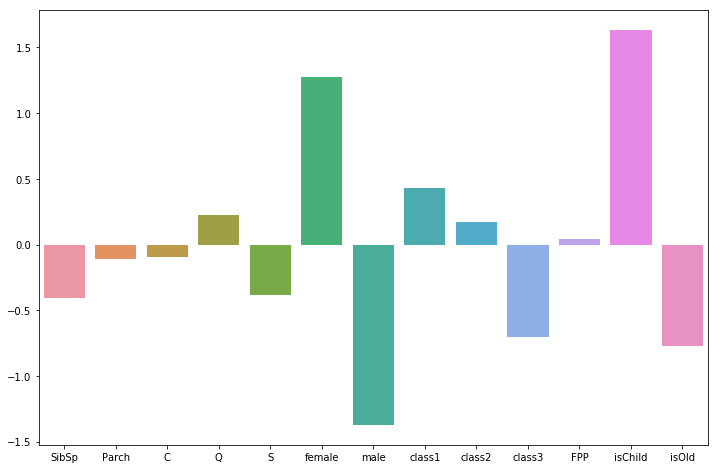

In [27]:
plt_features(basic_data.drop('Survived', axis=1), model)

In [28]:
# Нека опитаме с RandomForest

from sklearn.ensemble import RandomForestClassifier

x = basic_data.drop('Survived', axis=1)
y = basic_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.878009630819
test score:  0.779850746269


In [29]:
# Да пуснем и един GridSearch за да се справим с overfit-а

from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [10, 30, 50, 70, 100],
                              'max_depth': [2, 4, 6, 8, 10, 12, 15]})
search.fit(x, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,rank_test_score,mean_test_score,params
13,1,0.805836,"{'max_depth': 6, 'n_estimators': 70}"
6,1,0.805836,"{'max_depth': 4, 'n_estimators': 30}"
16,3,0.801347,"{'max_depth': 8, 'n_estimators': 30}"
12,3,0.801347,"{'max_depth': 6, 'n_estimators': 50}"
9,5,0.800224,"{'max_depth': 4, 'n_estimators': 100}"
10,5,0.800224,"{'max_depth': 6, 'n_estimators': 10}"
15,5,0.800224,"{'max_depth': 8, 'n_estimators': 10}"
20,8,0.799102,"{'max_depth': 10, 'n_estimators': 10}"
14,8,0.799102,"{'max_depth': 6, 'n_estimators': 100}"
5,10,0.795735,"{'max_depth': 4, 'n_estimators': 10}"


In [32]:
# Да пробваме пак с най-доброто

model = RandomForestClassifier(random_state=42, n_estimators=70, max_depth=6)
model.fit(x_train, y_train)

print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

train score: 0.837881219904
test score:  0.824626865672


In [31]:
# Да пробваме с различни опции за C на логистичната регресия

cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c in cs:
    model = LogisticRegression(C=c)
    model.fit(x_train, y_train)
    print(c, ": ", model.score(x_test, y_test))

0.001 :  0.738805970149
0.01 :  0.794776119403
0.1 :  0.809701492537
1 :  0.813432835821
10 :  0.813432835821
100 :  0.813432835821
1000 :  0.813432835821


In [58]:
# В крайна сметка да submit-нем

test = pd.read_csv('./test.csv', index_col="PassengerId")

test = test.join(pd.get_dummies(test['Embarked']))
test = test.join(pd.get_dummies(test['Sex']))
one_hot = pd.get_dummies(test['Pclass'])
one_hot.columns = ['class' + str(col) for col in one_hot.columns]
test = test.join(one_hot);
test = test.drop(['Sex', 'Embarked', 'Pclass'], axis=1)

tickets_count = {}
for ticket in test.Ticket:
    if ticket in tickets_count:
        tickets_count[ticket] += 1
    else:
        tickets_count[ticket] = 1

test['FPP'] = test['Fare'] / (test['Ticket'].apply(lambda t: tickets_count[t]))
test['FPP'] = test['FPP'].apply(lambda x: 30 if x>=30 else x//5*5)

test['FPP'] = test.FPP.fillna(test.FPP.median())

test['Age'] = test.Age.fillna(test.Age.mean())
test['isChild'] = (test['Age'] < 18) | (test['Name'].str.extract('([A-Za-z]+)\.', expand=False) == 'Master')
test['isOld'] = (test['Age'] > 50)

test = test.drop(['Age', 'Fare', 'Name', 'Ticket', 'Cabin'], axis=1)
test

,SibSp,Parch,C,Q,S,female,male,class1,class2,class3,FPP,isChild,isOld
PassengerId,,,,,,,,,,,,,
892,0,0,0,1,0,0,1,0,0,1,5.0,False,False
893,1,0,0,0,1,1,0,0,0,1,5.0,False,False
894,0,0,0,1,0,0,1,0,1,0,5.0,False,True
895,0,0,0,0,1,0,1,0,0,1,5.0,False,False
896,1,1,0,0,1,1,0,0,0,1,10.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,0,0,1,0,1,0,0,1,5.0,False,False
1306,0,0,1,0,0,1,0,1,0,0,30.0,False,False
1307,0,0,0,0,1,0,1,0,0,1,5.0,False,False


In [59]:
model = RandomForestClassifier(random_state=42, n_estimators=70, max_depth=6)
model.fit(x, y)

predictions = model.predict(test)
frame = pd.DataFrame({
    'PassengerId': pd.read_csv('./test.csv').PassengerId,
    'Survived': predictions
})
frame = frame.set_index('PassengerId')
frame.to_csv('./predictions.csv')

In [ ]:
# 1195-та позиция от 9345 със резултат от 0.80382